## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().any().any()

False

In [4]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [5]:
(X.dtypes == 'object').sum()

0

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.preprocessing import StandardScaler

In [29]:
normalizer = StandardScaler()
X_train_norm = pd.DataFrame(data=normalizer.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(data=normalizer.transform(X_test), columns=X_test.columns)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
print('NN\tTrain\tTest')
clf = list()
features_train, features_test = X_train_norm[['alcohol','magnesium']], X_test_norm[['alcohol', 'magnesium']]

for j, i in enumerate([1, 3, 5, 10, 15, 25]):
    clf.append(KNeighborsClassifier(n_neighbors=i).fit(features_train, y_train))
    train_accur = np.mean(clf[j].predict(features_train) == y_train)
    test_accur = np.mean(clf[j].predict(features_test) == y_test)
    print(f"{i:2d}\t{round(train_accur, 3)}\t{round(test_accur, 3)}")

NN	Train	Test
 1	1.0	0.611
 3	0.831	0.556
 5	0.806	0.593
10	0.79	0.593
15	0.742	0.537
25	0.758	0.519


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [60]:
!pip install mlxtend

  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [61]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

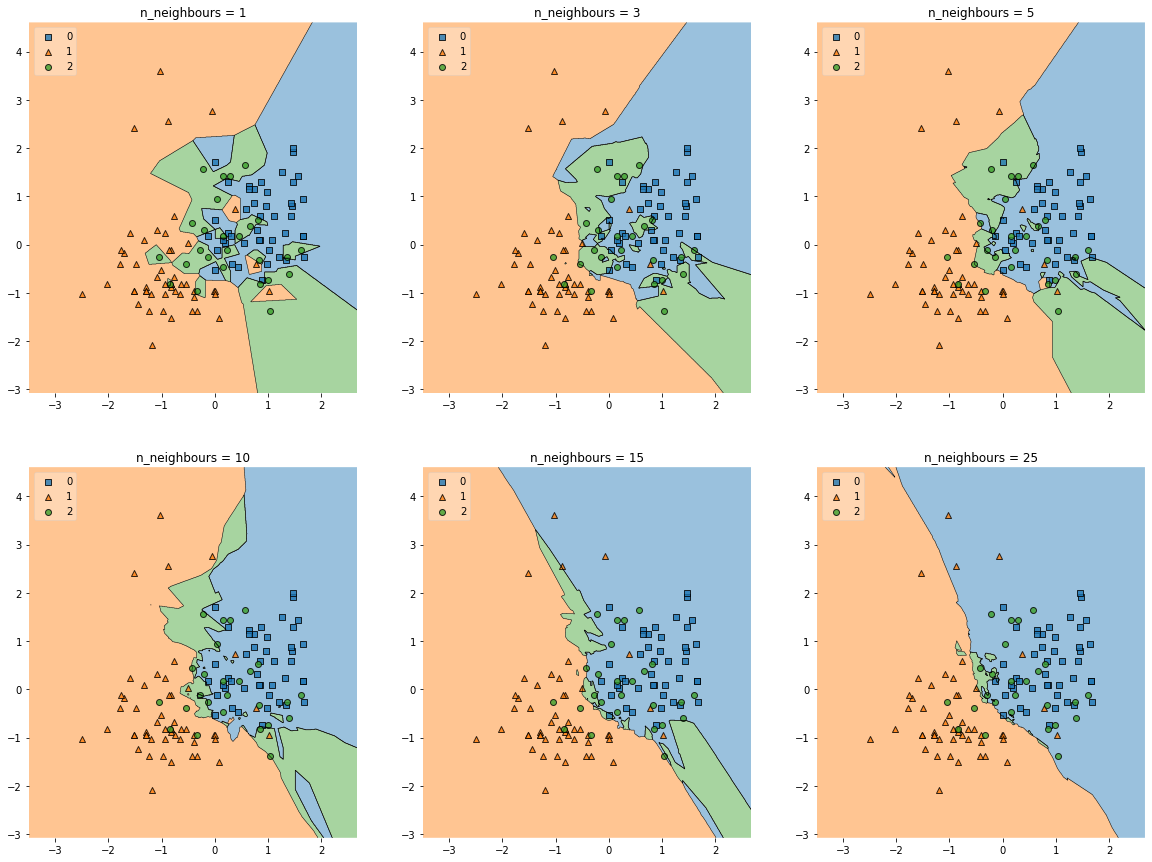

In [31]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,15))

labels = ['n_neighbours = {}'.format(i) for i in [1, 3, 5, 10, 15, 25]]
for clf_n, lab, grd in zip(clf,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(features_train), y=y_train, clf=clf_n, legend=2)
    plt.title(lab)

plt.show()

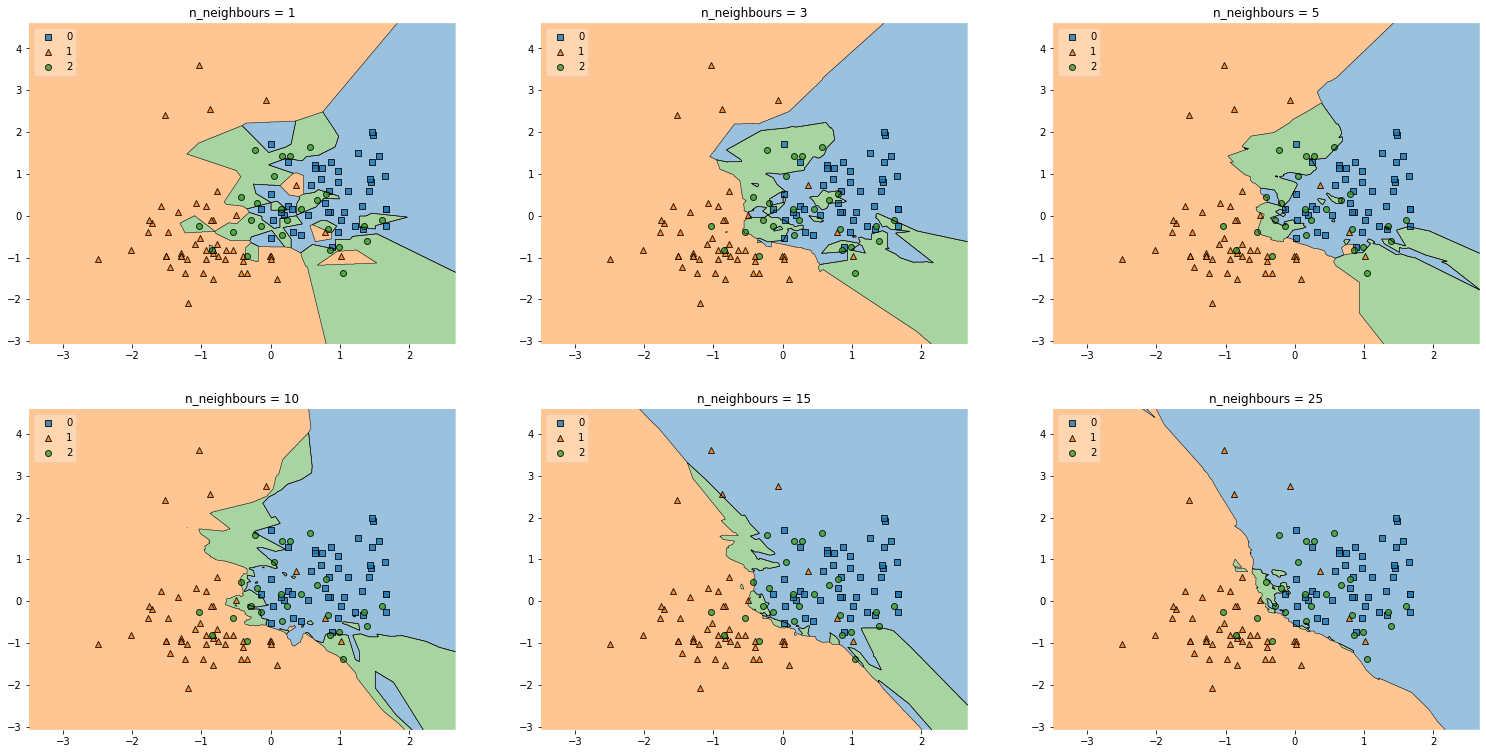

In [14]:
#sample

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

*С точки зрения MSE на тесте оптимальными получились `n = {1, 5, 10}`. Однако из графиков видно, что при малых n разделяющая поверхность слишком сложная - она слишком сильно ориентируется на шумовые объекты. С увеличением n поверхности становятся ровнее и выглядят наиболее разумно при `n = 5`. 10 соседей также дают приемлимую картинку, но я бы не стала брать четное n. А дальше, оранжевый и синий класс съедают зеленый и MSE увеличивается.*

**Ответ: оптимальное число соседей n = 5.**

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

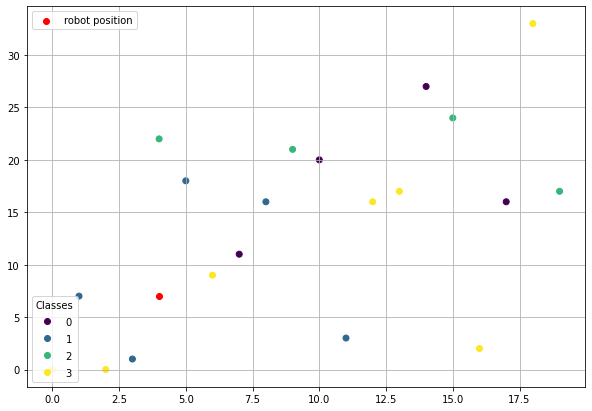

In [21]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        x, y = self.trajectory[-1]
        if np.random.binomial(1, 0.8):
            direction = self.mapping[int(self.knn.predict((self.trajectory[-1]).reshape(1,-1)))]
            x, y = x + direction[0], y + direction[1]
        else:
            x, y = x + self.mapping[0][0], y + self.mapping[0][1] 
        self.trajectory = np.vstack((self.trajectory, np.array([x, y])))
        
        
       

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [24]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

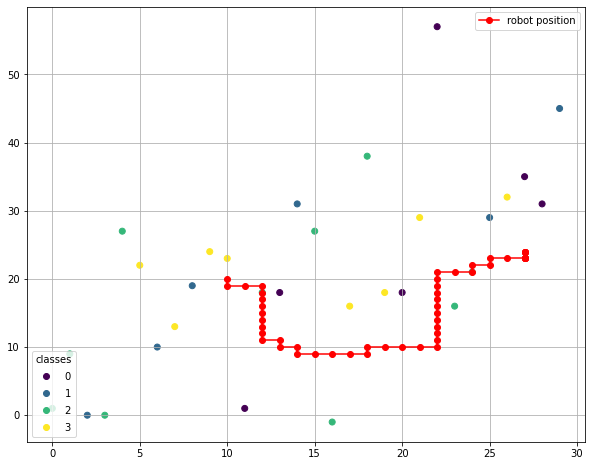

In [25]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

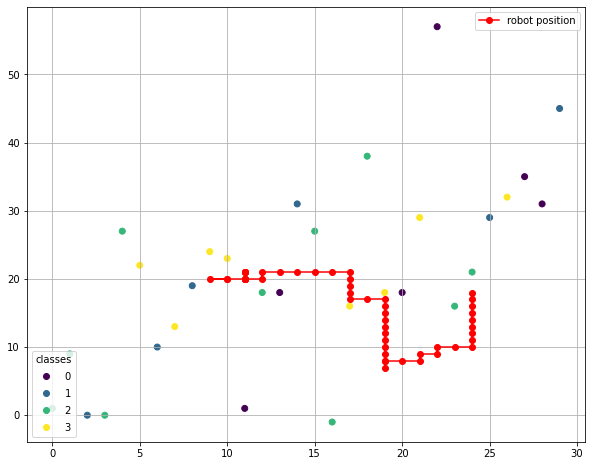

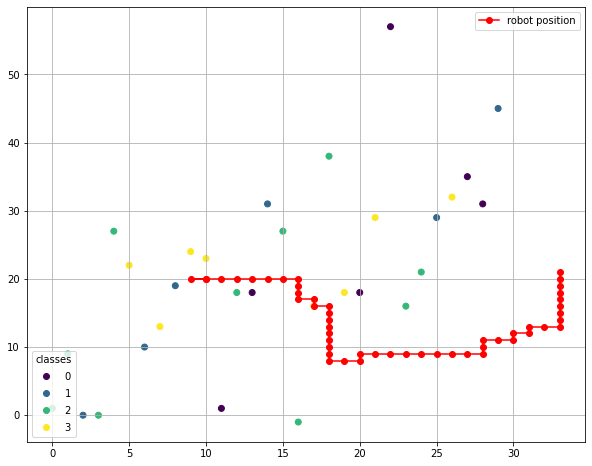

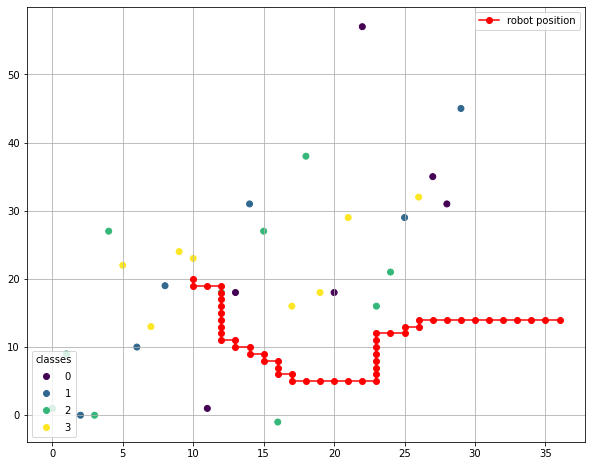

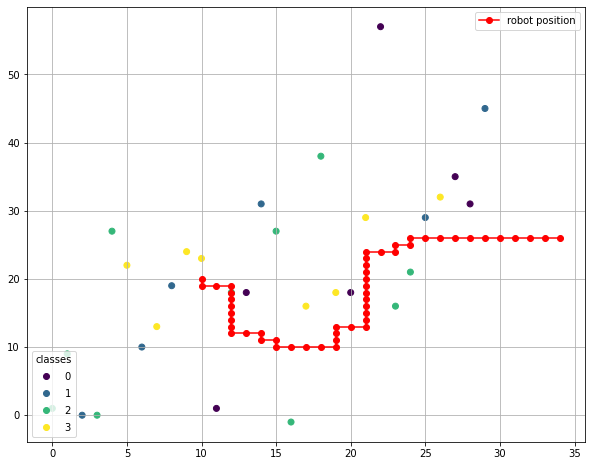

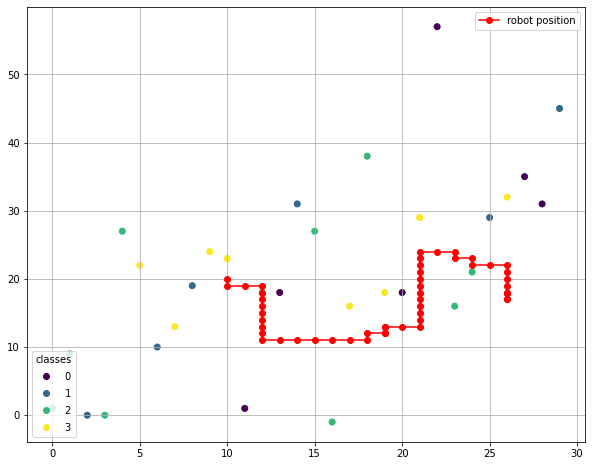

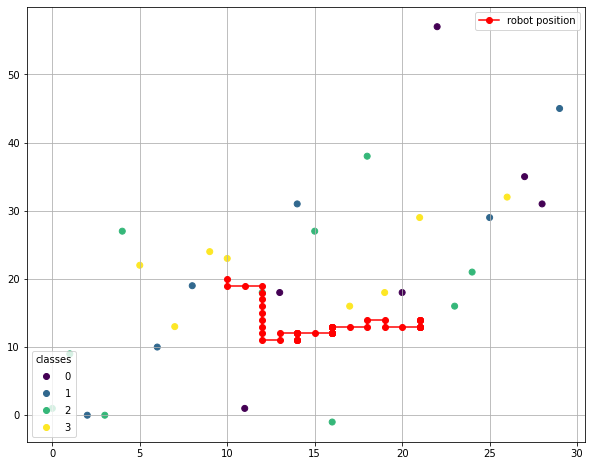

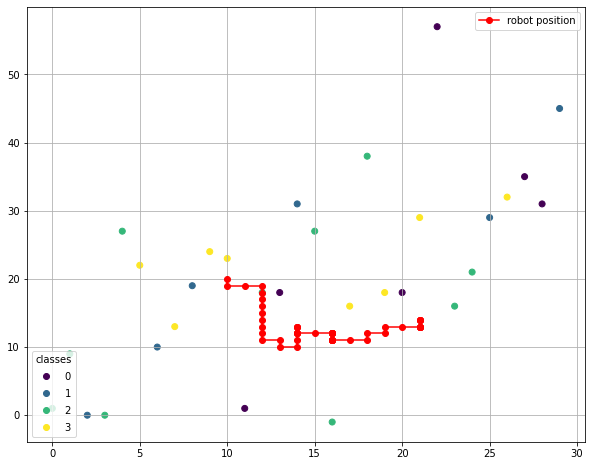

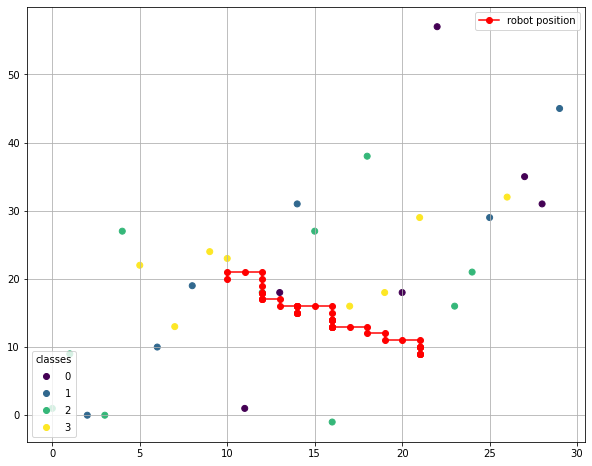

In [26]:
x = np.arange(30)
for i in (1, 3, 7, 9, 11, 13, 15, 17):
    conduct_experiment(x, mean = 3, std = 10, k = i, n_movements = 50)

1) С увеличением k уменьшается количество точек, идущих подряд в одном напрвлении, то есть уменьшается длина горизонтальных и вертикальных отрезков, ведь чем больше число соседей, тем меньше вероятность для двух близких точек оказаться в одном классе.

2) Если бы классы назначались не случайно, то по траектории робота было бы легко восстановить логику "метка-класс". А также можно добиться движения робота по любой интересующей нас траектории. Например, если распределить классы так, что метки одной координатной четверти принадлежат одному классу (определенным образом), то робот может двигаться почти по квадрату.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [32]:
data = pd.read_csv('data/diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [33]:
data.isnull().any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [34]:
 #no such features

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [35]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


*Больше всего с `price` коррелируют `carat`, `x`, `y` и `z`*

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [51]:
data_dum = pd.get_dummies(data, drop_first=True)
print(data_dum.shape)
data_dum

(53940, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [52]:
y = data_dum['price']
X = data_dum.drop('price', axis=1)

In [53]:
np.random.seed(777)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [54]:
normalizer = StandardScaler().fit(X_train)
X_train_norm = pd.DataFrame(data=normalizer.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(data=normalizer.transform(X_test), columns=X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
lr = LinearRegression().fit(X_train_norm, y_train)
#print(np.mean((lr.predict(X_train_norm) - y_train) ** 2))
#print(np.mean((lr.predict(X_test_norm - y_test) ** 2))
print('MSE on train:', mean_squared_error(y_train, lr.predict(X_train_norm)))
print('MSE on test:', mean_squared_error(y_test, lr.predict(X_test_norm)))

MSE on train: 1257866.5305181844
MSE on test: 1322524.3349658526


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [57]:
coef = lr.coef_
d_feature_coef = dict(itertools.zip_longest(X.columns, coef))
list_d = list(d_feature_coef.items())
list_d.sort(key=lambda i: abs(i[1]))
list_d

[('y', -1.7780519482212933),
 ('table', -59.78032297115128),
 ('z', -73.21495327302591),
 ('color_E', -76.78621190974171),
 ('depth', -92.32071976707249),
 ('color_F', -99.75736375460832),
 ('cut_Good', 159.3679024831367),
 ('color_G', -189.5216598393048),
 ('cut_Very Good', 302.17600975835825),
 ('cut_Premium', 325.96556294040755),
 ('color_H', -345.0560752044365),
 ('cut_Ideal', 400.04838474163273),
 ('color_I', -444.3412956024255),
 ('color_J', -519.2244638918745),
 ('clarity_IF', 948.9206579849299),
 ('clarity_SI2', 1021.3810570936887),
 ('x', -1173.3655838110078),
 ('clarity_VVS1', 1259.9487062350988),
 ('clarity_VVS2', 1438.6806288094906),
 ('clarity_SI1', 1580.1138782619128),
 ('clarity_VS1', 1641.9853090603938),
 ('clarity_VS2', 1787.5093648437307),
 ('carat', 5407.933975196698)]

*Наибольший коэффициент у `carat`. Он превышает кэффы при `y`, `z` и `table` на 2 порядка*

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [58]:
from sklearn.linear_model import Ridge, Lasso

In [59]:
lasso = Lasso(10.0).fit(X_train_norm, y_train)
lasso.coef_

array([4896.51137402,  -97.05315988,  -72.19638885, -691.62696809,
         -0.        ,  -89.70481692,   36.89808257,  193.69937996,
        138.99983942,  132.27596187,   -6.16685438,  -33.68739429,
       -111.90594271, -272.82138369, -369.73724311, -458.66915097,
        645.41927431,  864.60458938,  401.86755017, 1036.16433802,
       1088.81766516,  835.17956599,  950.05164271])

In [60]:
ridge = Ridge(10.0).fit(X_train_norm, y_train)
ridge.coef_

array([ 5.36662501e+03, -8.84638185e+01, -6.00299606e+01, -1.11485722e+03,
       -2.04036064e+00, -9.22495591e+01,  1.60165469e+02,  4.01478764e+02,
        3.27130579e+02,  3.03844553e+02, -7.63936457e+01, -9.96063522e+01,
       -1.89001355e+02, -3.44195842e+02, -4.42931018e+02, -5.17825693e+02,
        9.37071508e+02,  1.55054219e+03,  9.96278837e+02,  1.61731012e+03,
        1.75886951e+03,  1.24310739e+03,  1.41900600e+03])

*Вывод: коэффициент при х значительно уменьшился в обоих случаях (от -1100 до 0 и -2). Действительно, признак х сильно коррелировал с признаками carat, y, z, что являлось сигналом частичной мультиколлинеарности. Кроме того, коэффициенты при y и z в изначальной регрессии имели знаки, противоположные тем, что получились ридж- и лассо- регрессией. Таким образом, указанная неустойчивость оценок коэффициентов свидетельствует о наличии проблемы мультиколлинеарности в первоначальной регрессии, но насколько большая эта проблема - пока сказать сложно.*

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

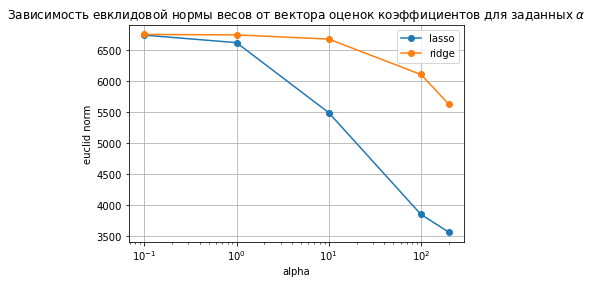

In [61]:
from matplotlib.pyplot import xscale

alphas = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []

for alpha in alphas:
    lasso = Lasso(alpha).fit(X_train_norm, y_train)
    ridge = Ridge(alpha).fit(X_train_norm, y_train) 
    norms_lasso.append(np.linalg.norm(lasso.coef_))
    norms_ridge.append(np.linalg.norm(ridge.coef_))

plt.plot(alphas, norms_lasso, 'o-', label='lasso')
plt.plot(alphas, norms_ridge, 'o-', label='ridge')
xscale('log')
plt.xlabel("alpha")
plt.ylabel("euclid norm")
plt.title(r'Зависимость евклидовой нормы весов от вектора оценок коэффициентов для заданных $\alpha$')
plt.legend()
plt.grid()
plt.show()

*Очевидно, Lasso агрессивнее уменьшает веса, т.к. при одинаковых  $\alpha$ норма весов Ridge-регрессии больше. Это происходит потому, что L1 регуляризатор учитывает квадраты весов, а L2 - модули, то есть Lasso сильнее штрафует за большие веса. Таким образом, Lasso-регрессию часто используют для отбора признаков, чтобы избавиться от линейной зависимости между ними, а значит, исключить решения со сколь угодно большими весами.*

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [47]:
from sklearn.linear_model import LassoCV

In [62]:
reg = LassoCV(alphas=alphas, cv=5, random_state=12345, max_iter=5000).fit(X_train_norm, y_train)
d_alpha_mse = dict(itertools.zip_longest(reg.alphas_, reg.mse_path_.mean(axis=1)))
list_d = list(d_alpha_mse.items())
list_d.sort(key=lambda i: i[1])
list_d

[(1.0, 1262363.5601791777),
 (0.1, 1262613.3174600701),
 (10.0, 1321451.7310635608),
 (100.0, 1776007.3930285305),
 (200.0, 2145289.3949866937)]

*Лучшее качество дает $\alpha = 1.0$*

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [63]:
final_lasso = Lasso(1.0, random_state=12345).fit(X_train_norm, y_train)
d_feature_coef = dict(itertools.zip_longest(X.columns, final_lasso.coef_))
list_d = list(d_feature_coef.items())
list_d.sort(key=lambda i: abs(i[1]))
list_d

[('y', -0.0),
 ('table', -61.004850159705505),
 ('color_E', -69.73147985880074),
 ('z', -70.04238371922074),
 ('color_F', -93.13503341448846),
 ('depth', -93.48444391392155),
 ('cut_Good', 147.1476245265034),
 ('color_G', -181.74280652196634),
 ('cut_Very Good', 285.1898075837555),
 ('cut_Premium', 307.3665057848801),
 ('color_H', -337.84358420925605),
 ('cut_Ideal', 379.47158178815647),
 ('color_I', -436.8940088451568),
 ('color_J', -513.1959740288004),
 ('clarity_IF', 918.1724804882383),
 ('clarity_SI2', 958.7193680923842),
 ('x', -1133.5737311180992),
 ('clarity_VVS1', 1216.9282489515601),
 ('clarity_VVS2', 1389.2214161599516),
 ('clarity_SI1', 1507.7554415037207),
 ('clarity_VS1', 1580.695548522777),
 ('clarity_VS2', 1716.8305031672237),
 ('carat', 5358.779499059778)]

*Таким образом, наиболее информативным признаком оказался вес алмаза в каратах, а самыми неинформативными оказались ширина y и глубина z алмаза. Действительно, чаще всего стоимость алмаза зависит именно от каратов. Кроме того, существует очевидная зависимость между размерами алмаза (`x, y, z`) и такими характеристиками, как `table, depth и carat`. Поэтому регуляризатор почти занулил соответствующие коэффициенты, чтобы устранить эту линейную связь между признаками.*

*Интересно также, что `clarity_IF` имеет небольшой вес относительно других `clarity`, хотя, согласно описанию датасета, IF - best clarity. Поэтому либо у нас есть выбросы, либо чистота алмаза действительно оказывает такое неочевидное влияние на цену.*

*С весами `cut`-ов все в порядке в том смысле, что они согласовываются с интуитивными представлениями (Fair < Good < Very Good < Premium < Ideal).*

*С признаком `color` получилось так, что One-hot выбросил лучший цвет `color_D`, но я не считаю это проблемой, потому что в конечном итоге все остальные цвета имеют довольно малые веса.*

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [64]:
print('Final Lasso MSE:', mean_squared_error(y_test, final_lasso.predict(X_test_norm)))
print('Basic LinReg MSE:', mean_squared_error(y_test, lr.predict(X_test_norm)))

Final Lasso MSE: 1322065.6441891803
Basic LinReg MSE: 1322524.3349658526


*Lasso-регрессия дает меньшую ошибку. Это можно объяснить тем, что такая регуляризация избавила нас от линейной зависимости между признаками, и мы оперировали весами, много меньшими по сравнению с получившимися обычной регрессией. Таким образом, Lasso уменьшила влияние выбросов на результат.*

*Однако разница между ошибками оказалась не такой большой. Поэтому можно сделать вывод, что наш датасет не сильно страдал от мультиколлинеарности.*